#### QUESTIONS
1. how to build datablock from CSV?
3. how to split train / valid by parent folder name?
4. Try writing in Transform class
5. how to turn a np.uint8 array into PILMask?  
**6. how to turn Transform class to final DataLoaders?**
7. what is TransformBlock??  

#### Solved
2. how to reconstruct the mask from a CSV?
3. how to overlay image and its mask on the same image??

#### Internal Link
- <a href=#DataTransform> Link to Individual Transform </a>
- <a href=#PipelineTransform> Link to Pipeline Transform </a>

In [1]:
from fastai2.vision.all import *

%load_ext autoreload
%autoreload 2

In [2]:
PATH = Path('/userhome/34/h3509807/ship-data')
PATH.ls()

(#5) [Path('/userhome/34/h3509807/ship-data/test_v2'),Path('/userhome/34/h3509807/ship-data/train_ship_segmentations_v2.csv'),Path('/userhome/34/h3509807/ship-data/airbus-ship-detection.zip'),Path('/userhome/34/h3509807/ship-data/sample_submission_v2.csv'),Path('/userhome/34/h3509807/ship-data/train_v2')]

In [3]:
PATH.ls()[1], PATH.ls()[3]

(Path('/userhome/34/h3509807/ship-data/train_ship_segmentations_v2.csv'),
 Path('/userhome/34/h3509807/ship-data/sample_submission_v2.csv'))

#### 1. Understand Data Directory, Labels
Indexing ImageId allows faster lookup on EncodedPixels by 100x

In [3]:
import pandas as pd

df = pd.read_csv(PATH.ls()[1])
df.head(10)

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733 33 268501 33 269269 33 270037 33 270805 33 271573 33 272341 33 273109 33 273877 33 274645 33 275413 33 276181 33 276949 33 277716 34 278484 34 279252 33 280020 33 280788 33 281556 33 282324 33 283092 33 283860 33 284628 33 285396 33 286164 33 286932 33 287700 33 288468 33 289236 33 290004 33 290772 33 291540 33 292308 33 293076 33 293844 33 294612 33 295380 33 296148 33 296916 33 297684 33 298452 33 299220 33 299988 33 300756 33 301524 33 302292 33 303060 33 303827 34 304595 34 305363 33 306131 33 306899 33 307667 33 308435 33 309203 33 309971...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 364321 10 365090 9 365858 10 366627 10 367396 9 368165 9 368933 10 369702 10 370471 9 371240 9 372009 9 372777 10 373546 9 374315 9 375084 7 375852 6 376621 3 377390 1
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 7 56442 7 57210 7 57978 7 58746 7 59514 7 60282 7 61050 9 61818 9 62586 9 63354 9 64122 9 64890 9
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392 10 202160 10 202928 10 203696 10 204464 10 205232 10 206000 10 206768 10 207536 10 208304 10 209072 10 209840 10 210608 10 211376 10 212144 10 212912 10 213680 10 214448 10 215216 10 215984 10 216751 10 217519 10 218287 10 219055 10 219823 10 220591 10 221359 10 222127 10 222895 10 223663 10 224431 10 225199 10 225967 10 226735 10 227503 10 228271 10 229039 10 229807 10 230575 10 231343 10 232111 10 232879 10 233647 10 234415 10
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 1 60291 1
7,000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 17 258229 17 258997 17 259765 17 260533 17 261301 17 262068 18 262836 17 263604 17 264372 17 265140 17 265908 17 266676 17 267444 17 268212 17 268980 17 269748 17 270516 17 271284 17 272052 17 272820 17 273588 17 274356 17 275124 17 275891 18 276659 17 277427 17 278195 17 278963 17 279731 17 280499 17 281267 17 282035 17 282803 17 283580 8
8,0001b1832.jpg,NaN
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 112123 6 112890 7 113657 8 114424 9 115191 10 115958 11 116725 12 117493 12 118260 13 119027 14 119794 14 120561 14 121328 15 122095 15 122863 14 123630 14 124397 14 125164 14 125931 15 126698 15 127465 15 128232 15 129000 14 129767 14 130534 15 131301 15 132070 13 132839 11 133608 9 134378 6 135147 5 135916 3 136685 1


In [111]:
df = pd.read_csv(PATH.ls()[1])
test_id = df.ImageId.iloc[-1]

In [67]:
%timeit df[df.ImageId == test_id]

14.7 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
df = df.set_index('ImageId')

In [116]:
df

,EncodedPixels
ImageId,
00003e153.jpg,NaN
0001124c7.jpg,NaN
000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733 33 268501 33 269269 33 270037 33 270805 33 271573 33 272341 33 273109 33 273877 33 274645 33 275413 33 276181 33 276949 33 277716 34 278484 34 279252 33 280020 33 280788 33 281556 33 282324 33 283092 33 283860 33 284628 33 285396 33 286164 33 286932 33 287700 33 288468 33 289236 33 290004 33 290772 33 291540 33 292308 33 293076 33 293844 33 294612 33 295380 33 296148 33 296916 33 297684 33 298452 33 299220 33 299988 33 300756 33 301524 33 302292 33 303060 33 303827 34 304595 34 305363 33 306131 33 306899 33 307667 33 308435 33 309203 33 309971...
000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 364321 10 365090 9 365858 10 366627 10 367396 9 368165 9 368933 10 369702 10 370471 9 371240 9 372009 9 372777 10 373546 9 374315 9 375084 7 375852 6 376621 3 377390 1
000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 7 56442 7 57210 7 57978 7 58746 7 59514 7 60282 7 61050 9 61818 9 62586 9 63354 9 64122 9 64890 9
...,...
fffedbb6b.jpg,NaN
ffff2aa57.jpg,NaN
ffff6e525.jpg,NaN


In [69]:
%timeit df.loc[test_id, 'EncodedPixels']

156 µs ± 28.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [136]:
img_id = '000194a2d.jpg'
df.loc[img_id, 'EncodedPixels']

ImageId
000194a2d.jpg                                                                                                                                                                                                                                                                              360486 1 361252 4 362019 5 362785 8 363552 10 364321 10 365090 9 365858 10 366627 10 367396 9 368165 9 368933 10 369702 10 370471 9 371240 9 372009 9 372777 10 373546 9 374315 9 375084 7 375852 6 376621 3 377390 1
000194a2d.jpg                                                                                                                                                                                                                                                                                                                                                    51834 9 52602 9 53370 9 54138 9 54906 9 55674 7 56442 7 57210 7 57978 7 58746 7 59514 7 60282 7 61050 9 61818 9 62586 9 63354 9 64122 9 64890 

In [70]:
df.head()

,EncodedPixels
ImageId,
00003e153.jpg,NaN
0001124c7.jpg,NaN
000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733 33 268501 33 269269 33 270037 33 270805 33 271573 33 272341 33 273109 33 273877 33 274645 33 275413 33 276181 33 276949 33 277716 34 278484 34 279252 33 280020 33 280788 33 281556 33 282324 33 283092 33 283860 33 284628 33 285396 33 286164 33 286932 33 287700 33 288468 33 289236 33 290004 33 290772 33 291540 33 292308 33 293076 33 293844 33 294612 33 295380 33 296148 33 296916 33 297684 33 298452 33 299220 33 299988 33 300756 33 301524 33 302292 33 303060 33 303827 34 304595 34 305363 33 306131 33 306899 33 307667 33 308435 33 309203 33 309971...
000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 364321 10 365090 9 365858 10 366627 10 367396 9 368165 9 368933 10 369702 10 370471 9 371240 9 372009 9 372777 10 373546 9 374315 9 375084 7 375852 6 376621 3 377390 1
000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 7 56442 7 57210 7 57978 7 58746 7 59514 7 60282 7 61050 9 61818 9 62586 9 63354 9 64122 9 64890 9


In [73]:
df.iloc[0]

EncodedPixels    NaN
Name: 00003e153.jpg, dtype: object

In [18]:
np.isnan(df.EncodedPixels[0])

True

In [6]:
submit_df = pd.read_csv(PATH.ls()[3])
submit_df.head()

,ImageId,EncodedPixels
0,00002bd58.jpg,1 2
1,00015efb6.jpg,1 2
2,00023d5fc.jpg,1 2
3,000367c13.jpg,1 2
4,0008ca6e9.jpg,1 2


In [7]:
fnames = get_image_files(PATH)
fnames

(#208162) [Path('/userhome/34/h3509807/ship-data/test_v2/a3f4a2c6a.jpg'),Path('/userhome/34/h3509807/ship-data/test_v2/c2da856e9.jpg'),Path('/userhome/34/h3509807/ship-data/test_v2/09674a357.jpg'),Path('/userhome/34/h3509807/ship-data/test_v2/267ad1801.jpg'),Path('/userhome/34/h3509807/ship-data/test_v2/530cdc454.jpg'),Path('/userhome/34/h3509807/ship-data/test_v2/b2ebd5e20.jpg'),Path('/userhome/34/h3509807/ship-data/test_v2/0035268d9.jpg'),Path('/userhome/34/h3509807/ship-data/test_v2/8f5002098.jpg'),Path('/userhome/34/h3509807/ship-data/test_v2/1f11bca38.jpg'),Path('/userhome/34/h3509807/ship-data/test_v2/bbbdd7365.jpg')...]

#### 2. Sample Check Input Images

#### 3. Grabbing Mask

In [81]:
def rle_decode(mask_rle, shape = (768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    img = np.zeros(shape[0]*shape[1], dtype = np.uint8)
    if isinstance(mask_rle, float):
        return img.reshape(shape).T
    
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype = int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

In [84]:
df = pd.read_csv(PATH.ls()[1])

In [85]:
idx = 4

mask_enc, img_id = df.EncodedPixels.iloc[4], df.ImageId.iloc[4]
mask_enc, img_id

('51834 9 52602 9 53370 9 54138 9 54906 9 55674 7 56442 7 57210 7 57978 7 58746 7 59514 7 60282 7 61050 9 61818 9 62586 9 63354 9 64122 9 64890 9',
 '000194a2d.jpg')

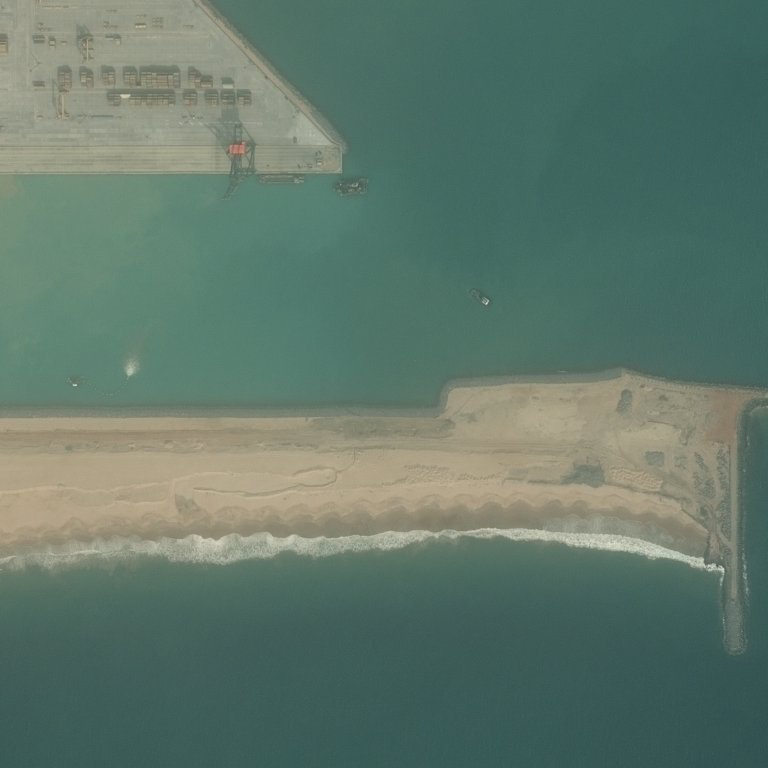

In [86]:
PILImage.create(PATH / 'train_v2' / img_id )

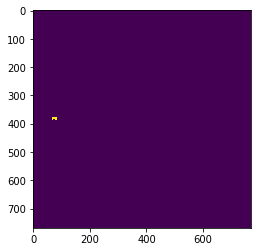

In [87]:
m = rle_decode(mask_enc)
plt.imshow(m);

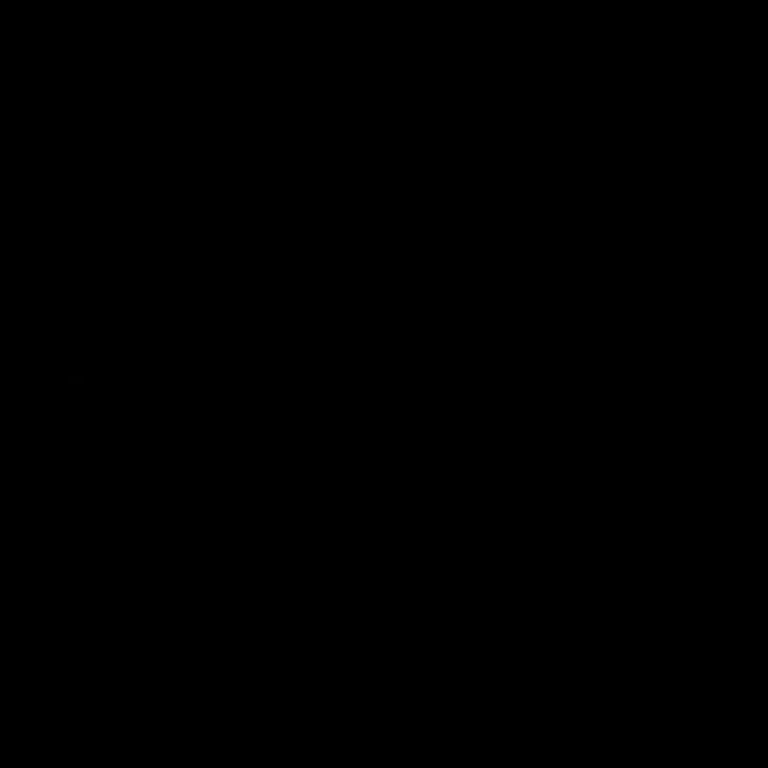

In [89]:
PILMask.create(m)

#### 4. Grabbing Data by DataBlock

In [34]:
dblock = DataBlock()
dsets = dblock.datasets(fnames)
dsets.train[0]

(Path('/userhome/34/h3509807/ship-data/train_v2/9dbadcf56.jpg'),
 Path('/userhome/34/h3509807/ship-data/train_v2/9dbadcf56.jpg'))

In [35]:
dblock = DataBlock(get_items = get_image_files)
dsets = dblock.datasets(PATH)
dsets.train[0]

(Path('/userhome/34/h3509807/ship-data/train_v2/873557ab1.jpg'),
 Path('/userhome/34/h3509807/ship-data/train_v2/873557ab1.jpg'))

In [50]:
fnames[0].name

'a3f4a2c6a.jpg'

In [36]:
parent_label(fnames[0])

'test_v2'

In [49]:
GrandparentSplitter('train_v2', 'test_v2')(fnames)

([], [])

In [60]:
dblock = DataBlock(
    blocks = (ImageBlock, ImageMask),
    get_items = get_image_files,
)

fastai2.data.transforms.ColReader

<a id='IndividualTransform'></a>
#### 5. Grab Data by Transform

In [7]:
from fastai2.vision.all import *
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
PATH = Path('/userhome/34/h3509807/ship-data')
csv_path = PATH.ls()[1]
df = pd.read_csv(csv_path)
df = df.set_index('ImageId')

In [9]:
class RawExtract(Transform):
    def __init__(self, csv_path):
        if isinstance(csv_path, str):
            csv_path = Path(csv_path)
        self.root = csv_path.parent
        self.setups(csv_path)
    
    def setups(self, csv_path):
        df = pd.read_csv(csv_path)
        self.df = df.set_index('ImageId')
        
    def encodes(self, img_id):
        fn = self.root / 'train_v2' / img_id
        rle = self.df.loc[img_id, 'EncodedPixels']
        return (fn, rle)
    
    def __repr__(self):
        print(f'df.size = {self.df.shape[0]}')
        print(f'cols: {list(self.df)}')
        return ''

In [10]:
tfms = RawExtract(csv_path = PATH.ls()[1])
tfms

df.size = 231723
cols: ['EncodedPixels']


In [11]:
items = L(df.index.to_list()).unique()
for i, data in items.enumerate():
    if i == 4: break
    fn, rle = tfms(data)
    print(fn)
    print(rle)

/userhome/34/h3509807/ship-data/train_v2/00003e153.jpg
nan
/userhome/34/h3509807/ship-data/train_v2/0001124c7.jpg
nan
/userhome/34/h3509807/ship-data/train_v2/000155de5.jpg
264661 17 265429 33 266197 33 266965 33 267733 33 268501 33 269269 33 270037 33 270805 33 271573 33 272341 33 273109 33 273877 33 274645 33 275413 33 276181 33 276949 33 277716 34 278484 34 279252 33 280020 33 280788 33 281556 33 282324 33 283092 33 283860 33 284628 33 285396 33 286164 33 286932 33 287700 33 288468 33 289236 33 290004 33 290772 33 291540 33 292308 33 293076 33 293844 33 294612 33 295380 33 296148 33 296916 33 297684 33 298452 33 299220 33 299988 33 300756 33 301524 33 302292 33 303060 33 303827 34 304595 34 305363 33 306131 33 306899 33 307667 33 308435 33 309203 33 309971 33 310739 33 311507 33 312275 33 313043 33 313811 33 314579 33 315347 33 316115 33 316883 33 317651 33 318419 33 319187 33 319955 33 320723 33 321491 33 322259 33 323027 33 323795 33 324563 33 325331 33 326099 33 326867 33 327635 

In [12]:
def rle_decode(mask_rle, shape = (768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    img = np.zeros(shape[0]*shape[1], dtype = np.uint8)
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype = int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction


class Rasterize(Transform):
    mask_sz = (768, 768)
    
    def encodes(self, x: Path):
        img = PILImage.create(x)
        return img
    
    def encodes(self, x: float):
        np_arr = np.zeros(shape = self.mask_sz, dtype = np.uint8)
        return PILMask.create(np_arr)
    
    def encodes(self, x: str):
        np_arr = rle_decode(x)
        return PILMask.create(np_arr)
        
    def encodes(self, x: pd.Series):
        rles = x.values.tolist()
        np_arr = np.zeros(shape = self.mask_sz, dtype = np.uint8)
        for rle in rles:
            tmp = rle_decode(rle)
            np_arr += tmp
        return PILMask.create(np_arr)

In [13]:
rasterize = Rasterize()
img, mask = rasterize(tfms(items[50]))
type(img), type(mask)

(fastai2.vision.core.PILImage, fastai2.vision.core.PILMask)

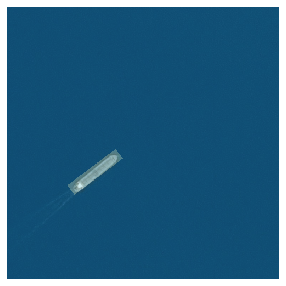

In [14]:
ctx = img.show()
mask.show(ctx = ctx);

In [15]:
class LabeledImage(Tuple):
    def show(self, ctx = None, **kwargs):
        img, mask = self
        ctx = img.show()
        return mask.show(ctx = ctx)

In [16]:
class Semantize(ItemTransform):
    def encodes(self, x):
        return LabeledImage(*x)

In [17]:
semantize = Semantize()

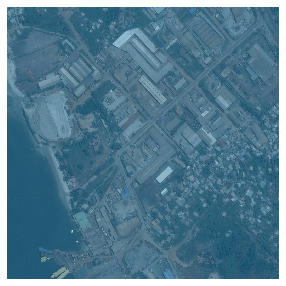

In [18]:
a = rasterize(tfms(items[5]))
o = semantize(a)
o.show();

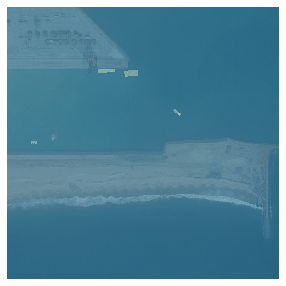

In [19]:
enc = rasterize(tfms(items[3]))
out = semantize(enc)
type(out), out.show();

<a id = 'PipelineTransform'></a>
### 6. Chaining into Pipeline